# Classification Problem
### Mobile Price Prediction

**Steps to build a machine learning model**
* Data preparation
* Feature Engineering
* Data Modeling 
* Performance Measure



### Data preparation

Steps

* Deal with missing values ( impute mean.median, mode) 
* Check for duplicates
* Check Data types
* Remove outliers (IQR, Cap/Floor, Log transformation techniques)
* Encode categorical values


In [40]:
#load libraries

import pandas as pd
import numpy as np

In [41]:
#load data
df = pd.read_csv('mobile_price_dataset/train.csv')

print(f'Data has a dimension of {df.shape[0]} rows and {df.shape[1]} columns.')
#preview first 5 rows
df.head()

Data has a dimension of 2000 rows and 21 columns.


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [42]:
#Data understanding

#check columns names
print(df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [43]:
#Summary Information on Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [44]:
#Confirm data types
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

* The dataset appears clean: confirm?
* Data types are all numeric (float/int)
* Some of features are categorical (nominal or ordinal to be determined)

In [45]:
#check missing values
round(df.isna().mean(),3)

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [46]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [47]:
#Inestigate the unique values
def unique_values(df):
    for col in df.columns:
        if df[col].nunique()<=8:
            print(f'{col}: {pd.unique(df[col])}')
        
unique_values(df)        

blue: [0 1]
dual_sim: [0 1]
four_g: [0 1]
n_cores: [2 3 5 6 1 8 4 7]
three_g: [0 1]
touch_screen: [0 1]
wifi: [1 0]
price_range: [1 2 3 0]


In [48]:
#Convert to categorical dtype
def cast_category(df, columns):
    for col in columns:
        df[col] = df[col].astype('category')
    return df

columns =['blue','dual_sim','four_g','n_cores','three_g','touch_screen', 'wifi', 'price_range']
df = cast_category(df,columns)

#check dtypes changed to category 
df.select_dtypes(include='category').dtypes

blue            category
dual_sim        category
four_g          category
n_cores         category
three_g         category
touch_screen    category
wifi            category
price_range     category
dtype: object

In [49]:
#summary Statistics
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [50]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns


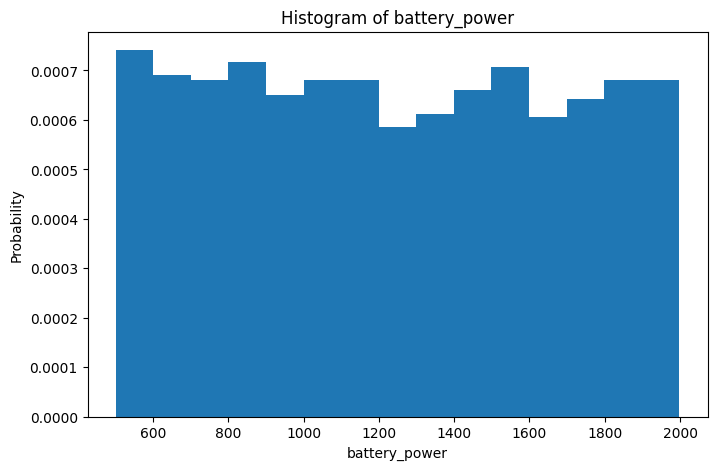

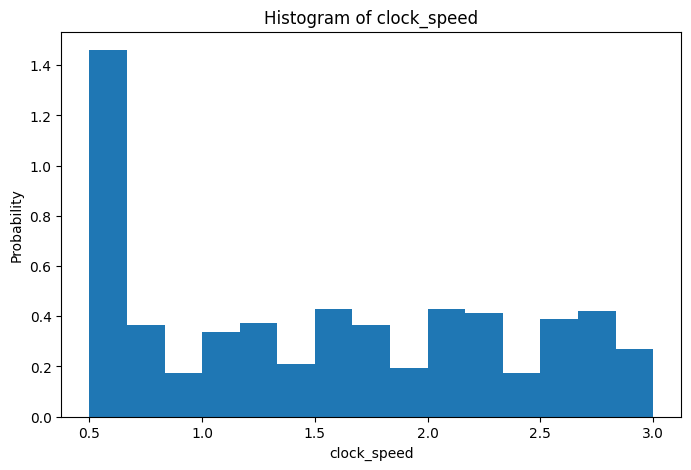

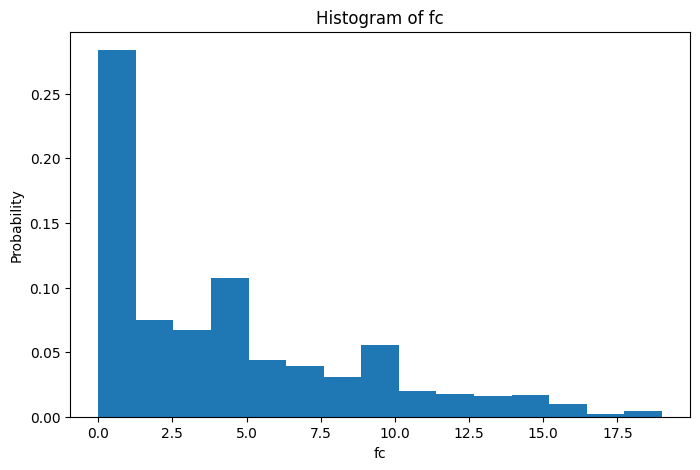

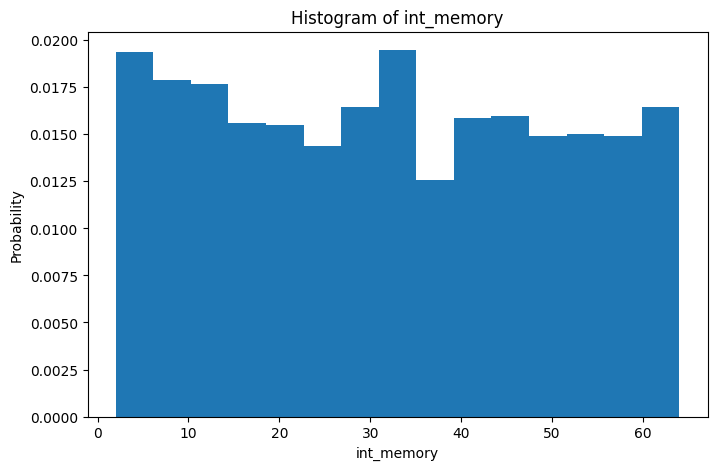

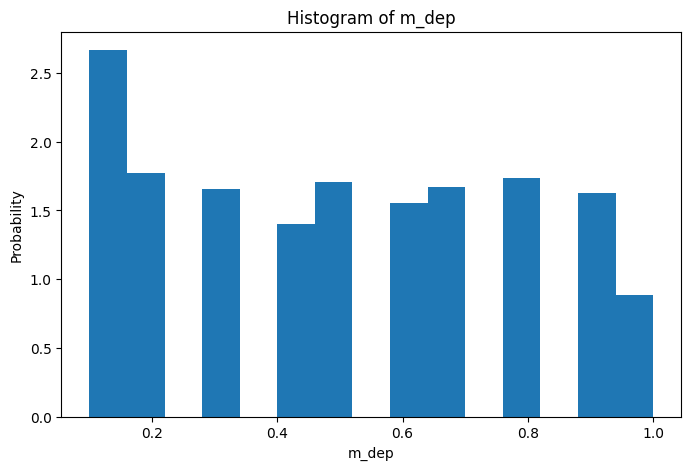

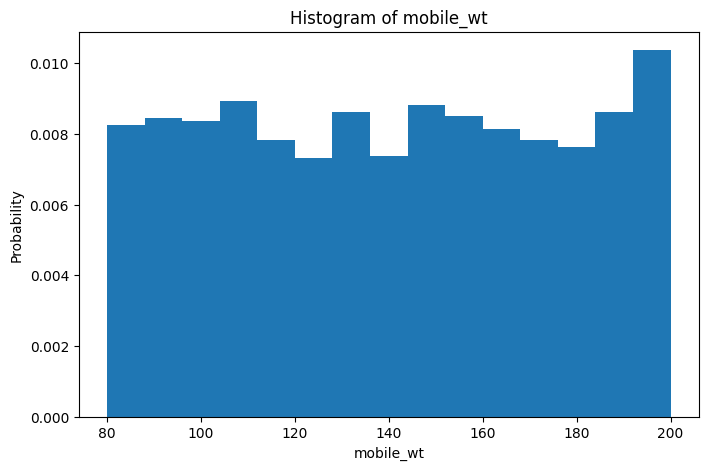

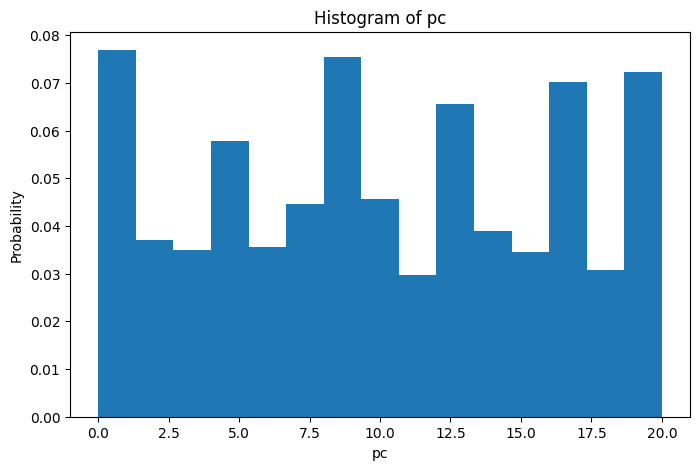

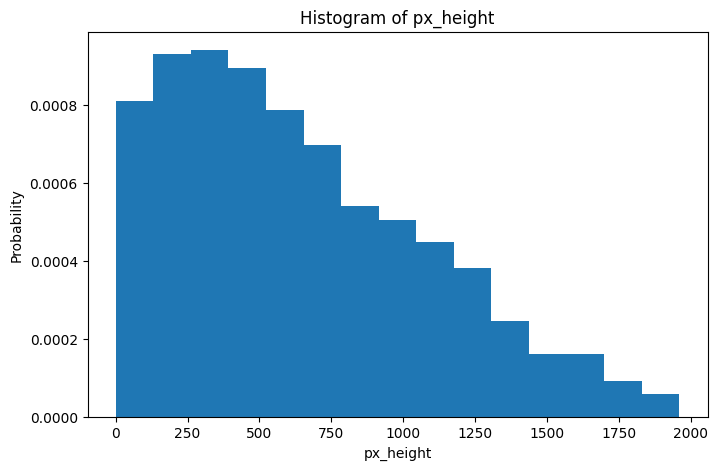

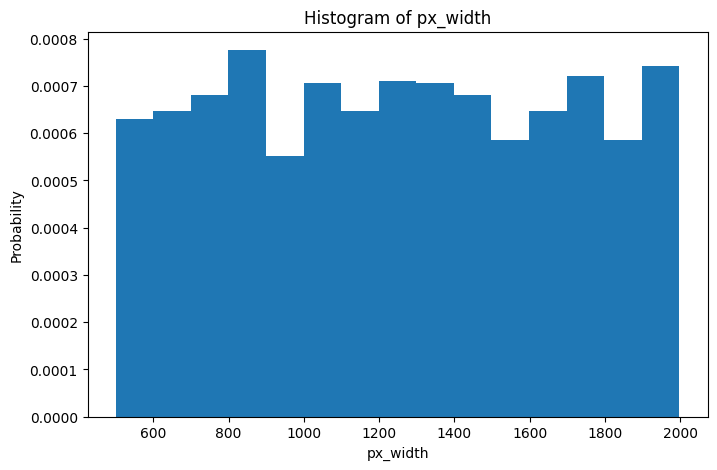

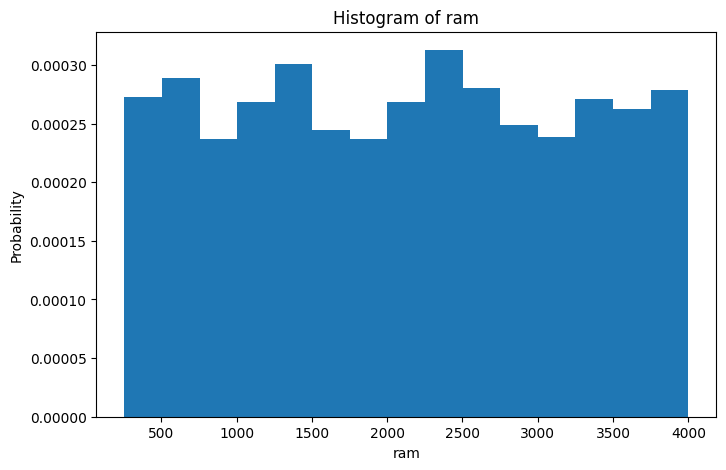

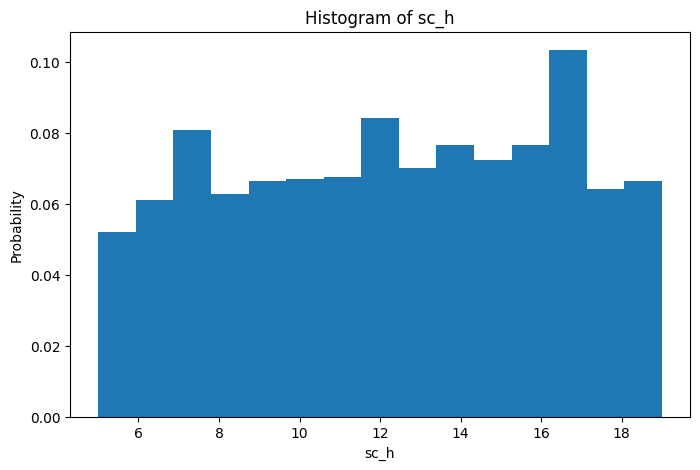

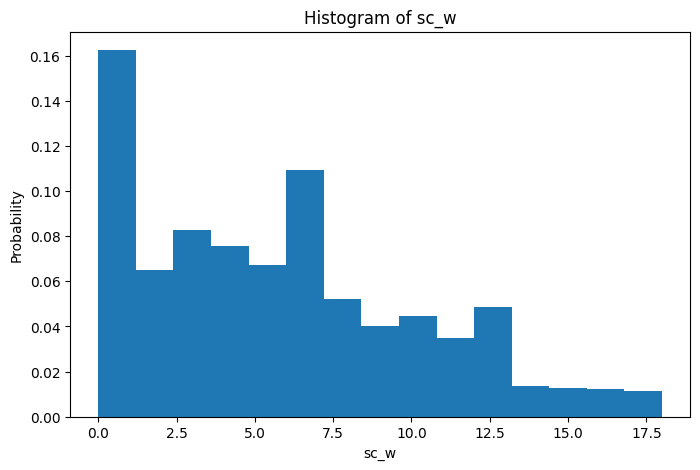

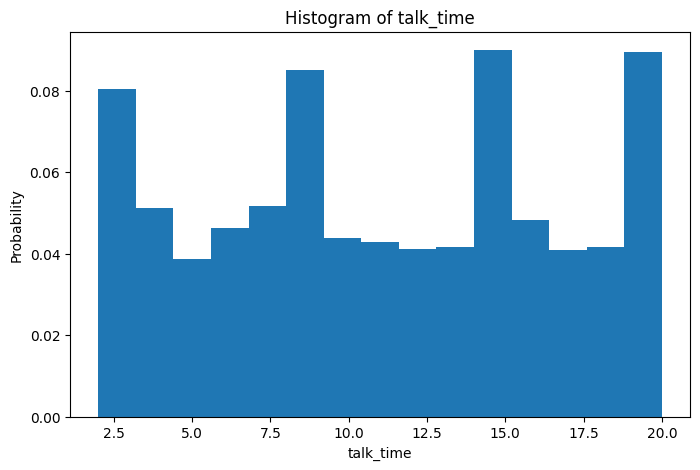

In [51]:
#plot distribution of non-categorical values

def plot_hist(df):
    for col in df.select_dtypes(include= np.number).columns:
        plt.figure(figsize=(8, 5))  
        plt.hist(df[col], bins=15, density=True)
        plt.xlabel(col)
        plt.ylabel('Probability')
        plt.title(f'Histogram of {col}')
        plt.show

plot_hist(df)


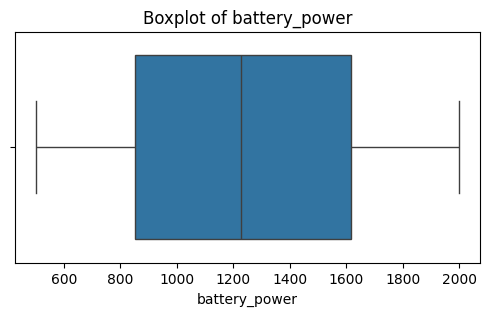

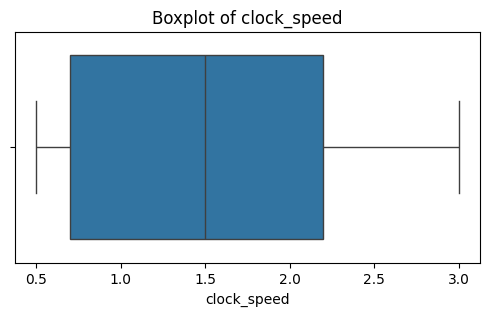

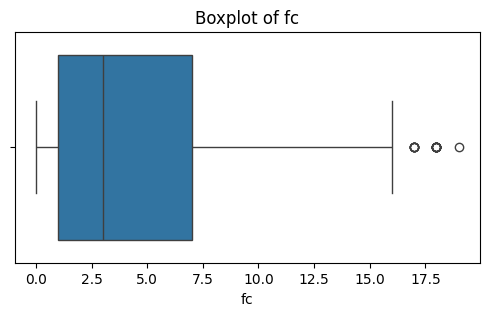

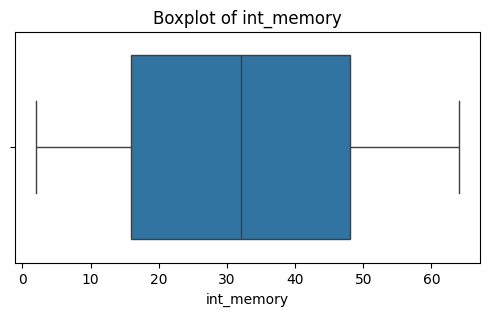

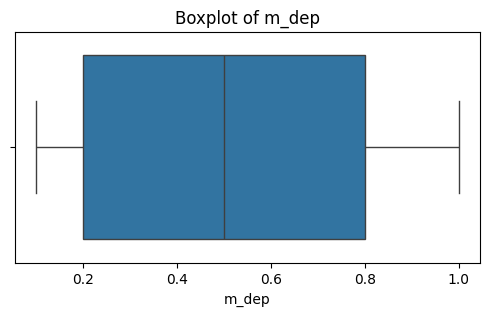

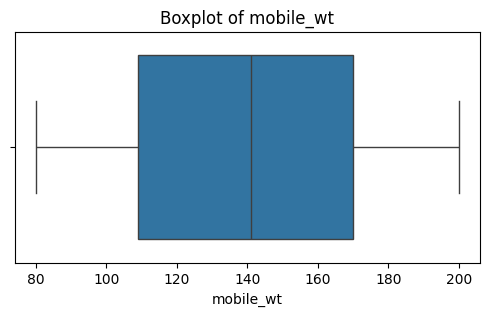

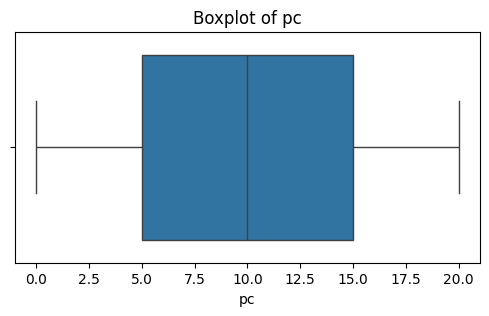

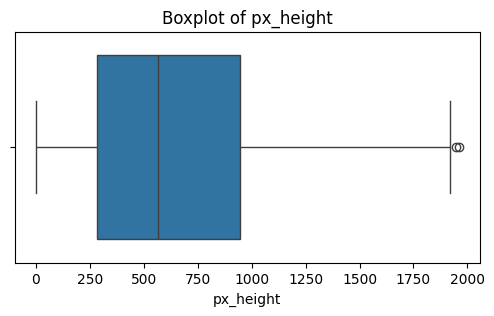

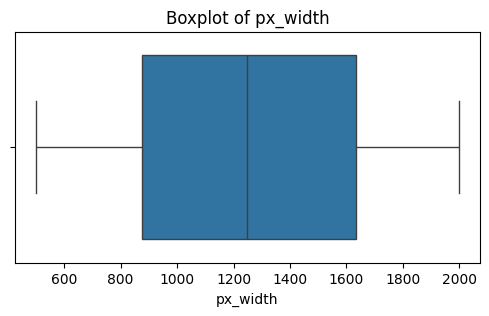

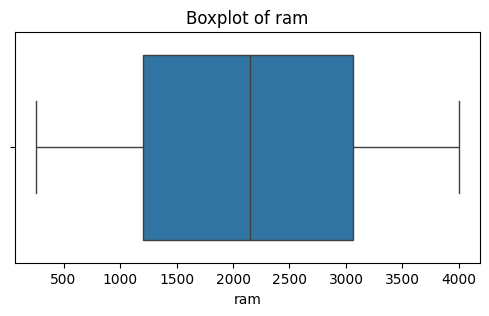

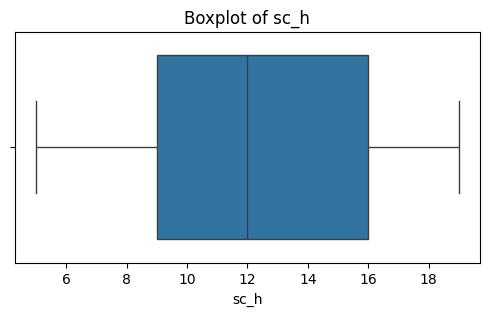

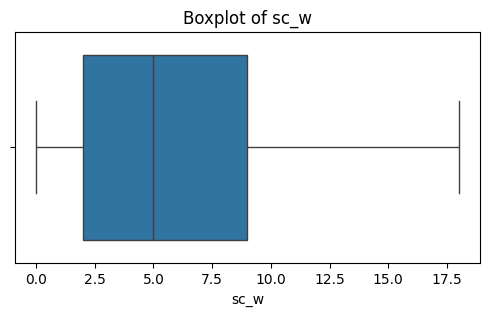

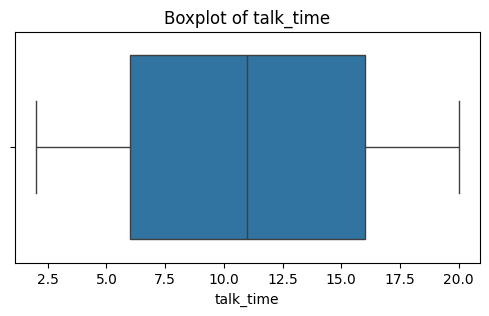

In [52]:
#Check Outlier

def check_outlier(df):

    for col in df.select_dtypes(include = np.number).columns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x= df[col])
        plt.xlabel(col)
        plt.title(f'Boxplot of {col}')
        plt.show()

check_outlier(df)

* feature 'fc' had significant outliers; fc is front camera megapixels
* feature'px_height' had outliers but they were close to the maximum val; they may prove informative
* rest of the features have no outliers

In [53]:
#IQR technique to address outliers in 'fc'
df_mobile = df.copy()

Q3 = np.percentile(df_mobile['fc'], 75)
Q1 = np.percentile(df_mobile['fc'],25)

IQR = Q3-Q1

upper_lim = Q3 + 1.5*IQR
lower_lim = Q1- 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_mobile['fc'] >= upper_lim)[0]
lower_array = np.where(df_mobile['fc'] <= lower_lim)[0]

# Removing the outliers
df_mobile.drop(index=upper_array, inplace=True)
df_mobile.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_mobile.shape)

New Shape:  (1958, 21)


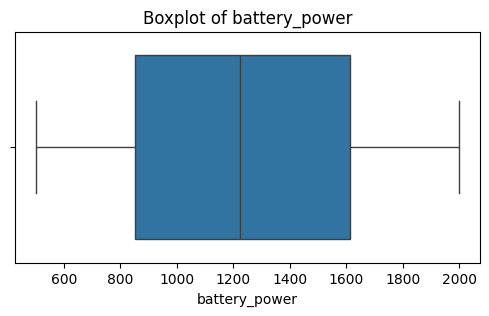

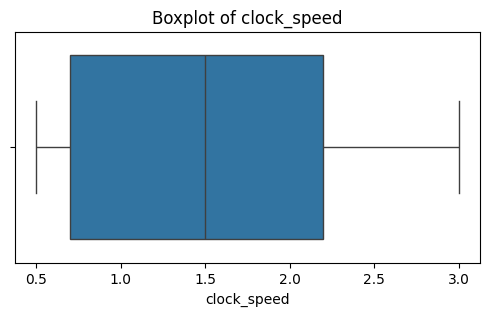

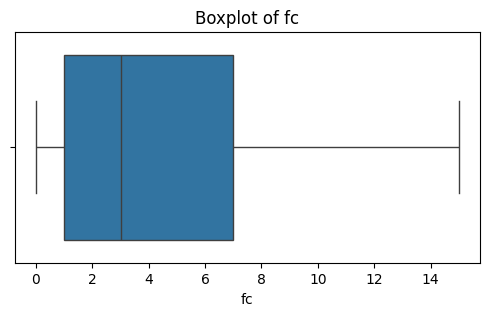

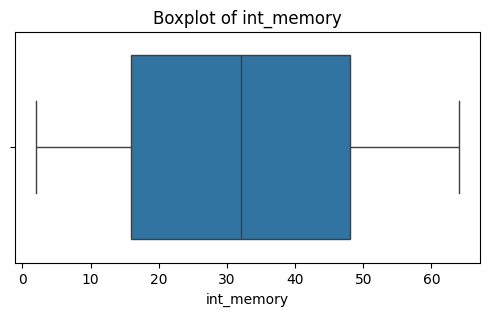

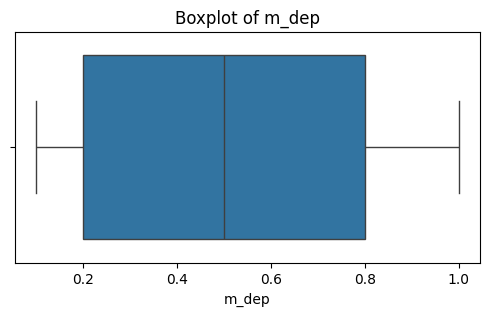

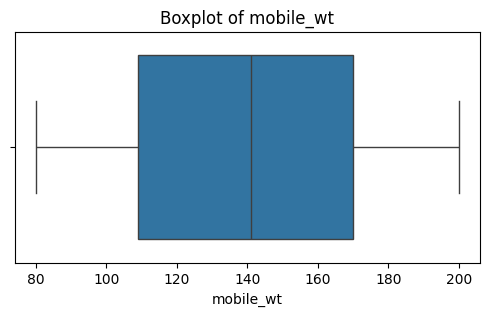

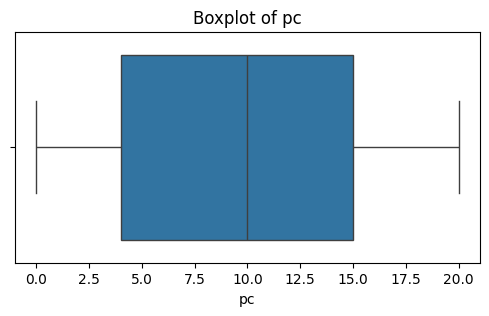

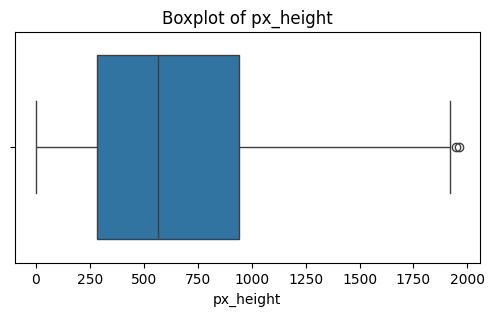

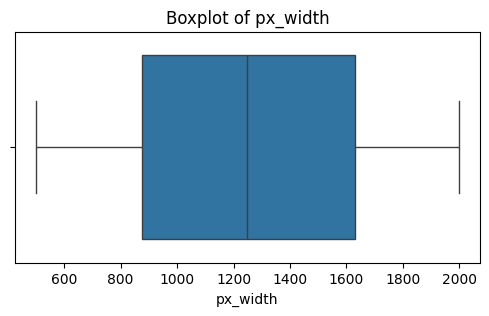

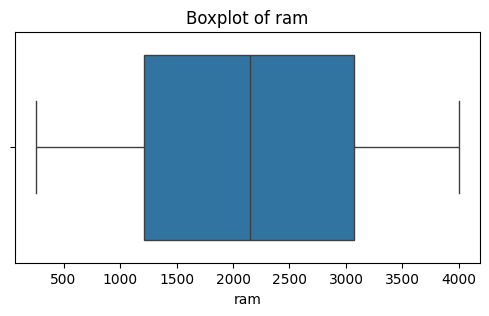

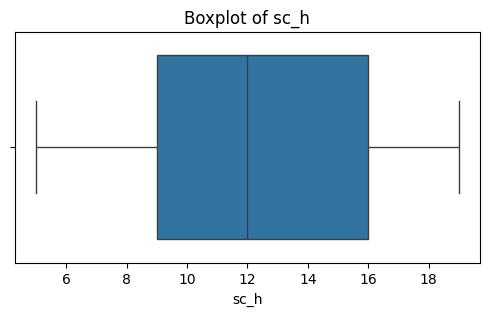

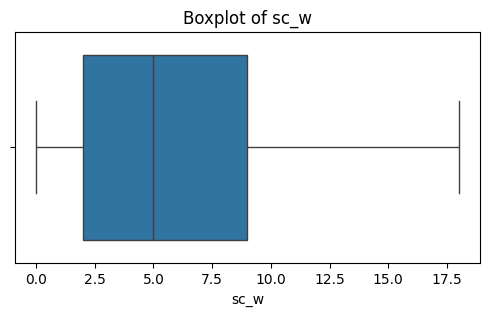

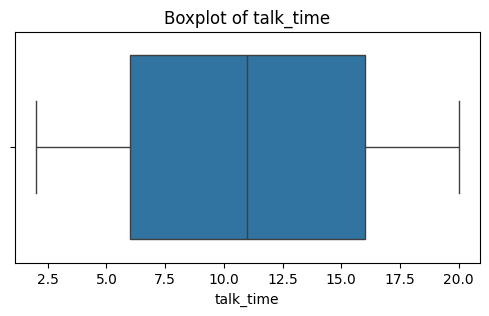

In [54]:
check_outlier(df_mobile)

### Feature Engineering

1. Feature construction: New features 
    1. sc_disp (screen display) (float) : sqaure_root(sc_height**2 + sc_width**2)
    2. px_total (int) = px_w * ph_h
    3. pixels per inch (int): square_root(px_h**2 + px_w**2)/sc_disp

2. Feature transformation : Scaling (Standardize numerical features)
3. EDA : scatter plots, correlation matrix
4. Feature reduction : RFE and Select Kbest

In [55]:
# Load required libraries
#import math as m
from sklearn.preprocessing import StandardScaler

In [56]:
def cm_to_inch(cm):
    ''' convert cm to inches'''
    inches = cm * 0.393701
    return inches

#convert features from cm to inches
df_mobile['m_dep']= df_mobile['m_dep'].apply(cm_to_inch)
df_mobile['sc_w'] = df_mobile['sc_w'].apply(cm_to_inch)
df_mobile['sc_h'] = df_mobile['sc_h'].apply(cm_to_inch)
print('Features "m_dep", "sc_w" and "sc_h" converted to inches.')

#preview conversion
df_mobile[['m_dep','sc_w','sc_h' ]].head()

Features "m_dep", "sc_w" and "sc_h" converted to inches.


,m_dep,sc_w,sc_h
0,0.236221,2.755907,3.543309
1,0.275591,1.181103,6.692917
2,0.354331,0.787402,4.330711
3,0.314961,3.149608,6.299216
4,0.236221,0.787402,3.149608


In [57]:
#Feature construction

#Screen display (diagonal size)
df_mobile['scp_disp']= np.sqrt((df_mobile['sc_w'].loc[:]**2) + (df_mobile['sc_h'].loc[:]**2))
print(f"screen display feature created, data type {df_mobile['scp_disp'].dtypes}")

#total pixels
df_mobile['px_total']= df_mobile['px_width'].loc[:] * df_mobile['px_height'].loc[:]
print(f"Total pixels feature created, data type {df_mobile['px_total'].dtypes}")

#Pixel per inch
df_mobile['ppi'] = np.sqrt(((df_mobile['px_width'].loc[:]**2)+(df_mobile['px_height'].loc[:]**2))//df_mobile['scp_disp'])
print(f"Pixel Per Inch feature created, data type {df_mobile['ppi'].dtypes}")


screen display feature created, data type float64
Total pixels feature created, data type int64
Pixel Per Inch feature created, data type float64


math.sqrt expected element for successful operation not the entire series hence it could not convert first eqaution to float. 
numpy.sqrt was better suited based on how the equation was set up

In [58]:
#Initialize StandardScaler
scaler = StandardScaler()

#apply scaler to numeric features
numeric_cols = df_mobile.select_dtypes(include=np.number).columns.tolist() 

scaled_cols = scaler.fit_transform(df_mobile[numeric_cols])

# Assign scaled values back to the DataFrame
df_mobile[numeric_cols] = pd.DataFrame(scaled_cols, columns=numeric_cols, index=df_mobile.index)

df_mobile.head() #print the first few rows to check

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,scp_disp,px_total,ppi
0,-0.900357,0,0.834967,0,-0.764562,0,-1.384136,0.336420,1.350733,2,...,-0.789372,0.276845,1.465093,0,0,1,1,-0.507218,-1.074449,-1.066044
1,-0.492840,1,-1.249539,1,-1.015822,1,1.151846,0.683292,-0.118502,3,...,1.112893,-0.640351,-0.734372,1,1,0,2,0.638799,1.088751,0.678030
2,-1.535536,1,-1.249539,1,-0.513301,1,0.490286,1.377037,0.135789,5,...,-0.313806,-0.869651,-0.367794,1,1,0,2,-0.550512,1.535170,1.322467
3,-1.417151,1,1.202821,0,-1.015822,0,-1.218746,1.030165,-0.259774,6,...,0.875110,0.506145,-0.001217,1,0,0,2,0.761178,1.540587,0.592095
4,1.328463,1,-0.391213,0,2.250568,1,0.655676,0.336420,0.022771,2,...,-1.027155,-0.869651,0.731938,1,1,0,1,-1.124238,0.682496,1.083627


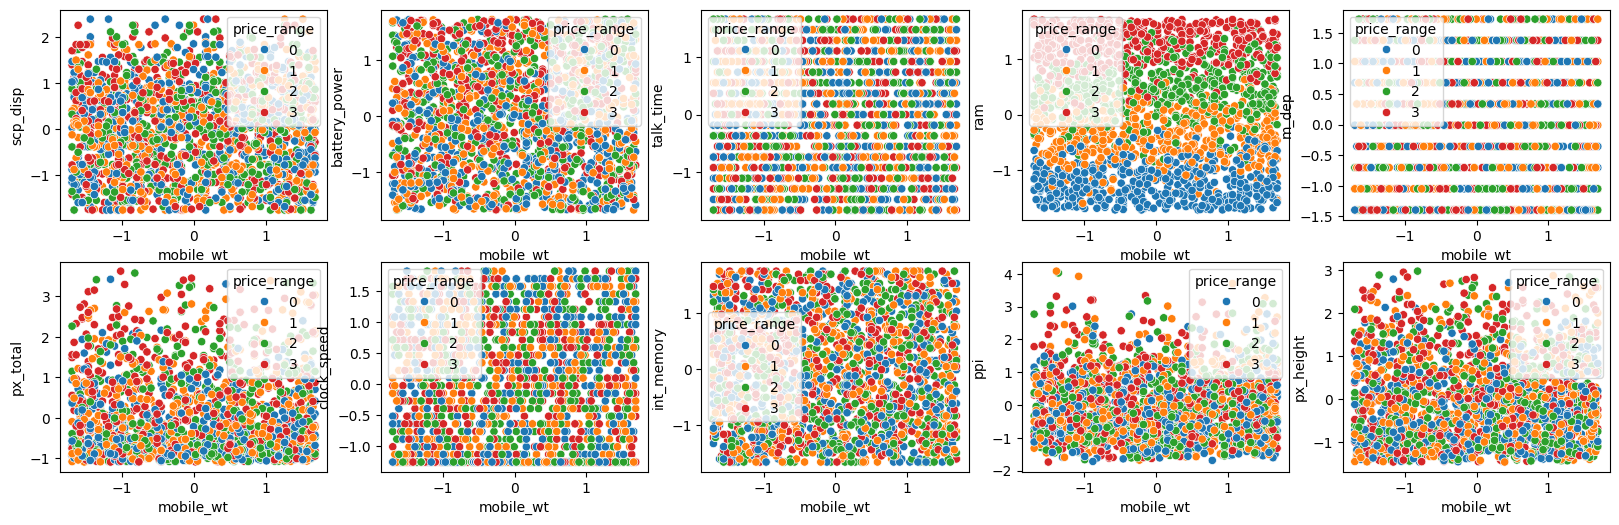

In [59]:
#EDA

#Scatter plot

#Does phone weight correlate to any of the design features?

#create subplot

fig = plt.figure(figsize=(20,6)) #intialize figure
ax0 = fig.add_subplot(2,5,1)
ax1 = fig.add_subplot(2,5,2)
ax2 = fig.add_subplot(2,5,3)
ax3 = fig.add_subplot(2,5,4)
ax4 = fig.add_subplot(2,5,5)
ax5 = fig.add_subplot(2,5,6)
ax6 = fig.add_subplot(2,5,7)
ax7 = fig.add_subplot(2,5,8)
ax8 = fig.add_subplot(2,5,9)
ax9 = fig.add_subplot(2,5,10)

sns.scatterplot(data=df_mobile, x="mobile_wt" , y="scp_disp" , hue= "price_range",ax=ax0)

sns.scatterplot(data=df_mobile, x="mobile_wt" , y="battery_power" , hue= "price_range",ax=ax1)

sns.scatterplot(data=df_mobile, x="mobile_wt" , y="talk_time" , hue= "price_range",ax=ax2)

sns.scatterplot(data=df_mobile, x="mobile_wt" , y="ram" ,hue= "price_range", ax=ax3)

sns.scatterplot(data=df_mobile, x="mobile_wt" , y="m_dep" ,hue= "price_range", ax=ax4)

sns.scatterplot(data=df_mobile, x="mobile_wt" , y="px_total" ,hue= "price_range", ax=ax5)

sns.scatterplot(data=df_mobile, x="mobile_wt" , y="clock_speed" ,hue= "price_range", ax=ax6)

sns.scatterplot(data=df_mobile, x="mobile_wt" , y="int_memory" ,hue= "price_range", ax=ax7)

sns.scatterplot(data= df_mobile, x = "mobile_wt", y = "ppi", hue= "price_range",ax=ax8 )

sns.scatterplot(data= df_mobile, x = "mobile_wt", y = "px_height", hue= "price_range",ax=ax9 )


plt.show()


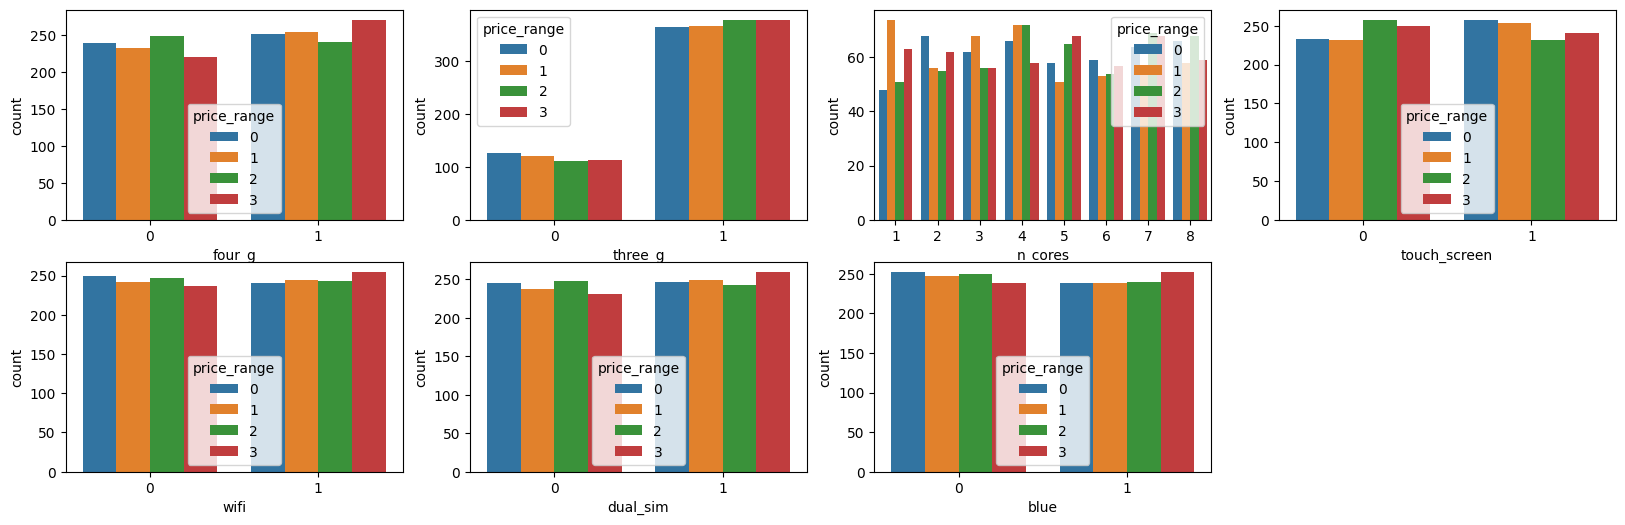

In [60]:
#EDA 

#Count Plot

#Question: What mobile phone features impact cost?

fig = plt.figure(figsize=(20,6)) #intialize figure
ax0 = fig.add_subplot(2,4,1)
ax1 = fig.add_subplot(2,4,2)
ax2 = fig.add_subplot(2,4,3)
ax3 = fig.add_subplot(2,4,4)
ax4 = fig.add_subplot(2,4,5)
ax5 = fig.add_subplot(2,4,6)
ax6 = fig.add_subplot(2,4,7)


sns.countplot(data=df_mobile, x="four_g", hue='price_range', ax=ax0)

sns.countplot(data=df_mobile, x="three_g", hue= "price_range",ax=ax1)

sns.countplot(data=df_mobile, x="n_cores" , hue= "price_range",ax=ax2)

sns.countplot(data=df_mobile, x="touch_screen", hue= "price_range", ax=ax3)

sns.countplot(data=df_mobile, x="wifi", hue= "price_range", ax=ax4)

sns.countplot(data=df_mobile, x="dual_sim" , hue= "price_range", ax=ax5)

sns.countplot(data=df_mobile, x="blue" , hue= "price_range", ax=ax6)

plt.show()

In [61]:
#Feature Selection: SelectKbest

#Required library
from sklearn.feature_selection import SelectKBest,chi2,f_classif

#chi2 cannot work with negative X values

In [62]:
#initialize predictors and target
y= df_mobile['price_range'] #target
X = df_mobile[[col for col in df_mobile.columns if col != 'price_range']] #predictors

#intialize SelectKBest
select_features = SelectKBest(score_func=f_classif,k=6)

#feature reduction
df_reduced = select_features.fit_transform(X,y)

#get selected features
feature_filter = select_features.get_support()

selected_features = X.columns[feature_filter]

print(f"SelectKBest top 6 features are: {selected_features.tolist()}.")




SelectKBest top 6 features are: ['battery_power', 'px_height', 'px_width', 'ram', 'px_total', 'ppi'].


### Data Modeling

** Classification Problem **

1. Algorithms:
    1.  Rule based: Decision Tree
    2.  Instance based: KNN  
    4.  Binary Class: Logistic Regression 

2. GridSearch CV: hyperparemter tuning and kfold

3. Evaluation metrics

4. Model Pipelines


In [63]:
#Required libraries
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline


In [64]:
#Predictors
X_train = X[selected_features.to_list()]
y_train = y

In [65]:
#load test data
df_test = pd.read_csv("mobile_price_dataset/test.csv")

print(f'Data has a dimension of {df_test.shape[0]} rows and {df_test.shape[1]} columns.')

#preview first 5 rows
df_test.head()


Data has a dimension of 1000 rows and 21 columns.


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [66]:
df_mobile_test = df_test.copy()

In [67]:
#Cast categorical features to category dtype
columns =['blue','dual_sim','four_g','n_cores','three_g','touch_screen', 'wifi', 'price_range']
df_mobile_test = cast_category(df,columns)

#check dtypes changed to category 
df_mobile_test.select_dtypes(include='category').dtypes

#convert features from cm to inches
df_mobile_test['m_dep']= df_mobile_test['m_dep'].apply(cm_to_inch)
df_mobile_test['sc_w'] = df_mobile_test['sc_w'].apply(cm_to_inch)
df_mobile_test['sc_h'] = df_mobile_test['sc_h'].apply(cm_to_inch)
print('Features "m_dep", "sc_w" and "sc_h" converted to inches.')

#Feature construction

#Screen display (diagonal size)
df_mobile_test['scp_disp']= np.sqrt((df_mobile_test['sc_w'].loc[:]**2) + (df_mobile_test['sc_h'].loc[:]**2))
print(f"screen display feature created, data type {df_mobile_test['scp_disp'].dtypes}")

#total pixels
df_mobile_test['px_total']= df_mobile_test['px_width'].loc[:] * df_mobile_test['px_height'].loc[:]
print(f"Total pixels feature created, data type {df_mobile_test['px_total'].dtypes}")

#Pixel per inch
df_mobile_test['ppi'] = np.sqrt(((df_mobile_test['px_width'].loc[:]**2)+(df_mobile_test['px_height'].loc[:]**2))//df_mobile_test['scp_disp'])
print(f"Pixel Per Inch feature created, data type {df_mobile_test['ppi'].dtypes}")

Features "m_dep", "sc_w" and "sc_h" converted to inches.
screen display feature created, data type float64
Total pixels feature created, data type int64
Pixel Per Inch feature created, data type float64


In [68]:
df_mobile_test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'scp_disp', 'px_total', 'ppi'],
      dtype='object')

In [69]:
#apply scaler to numeric features
numeric_cols_test = df_mobile_test.select_dtypes(include=np.number).columns.tolist() 

scaled_cols_test = scaler.transform(df_mobile_test[numeric_cols_test])

# Assign scaled values back to the DataFrame
df_mobile_test[numeric_cols_test] = pd.DataFrame(scaled_cols_test, columns=numeric_cols_test, index=df_mobile_test.index)

df_mobile_test.head() #print the first few rows to check

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,scp_disp,px_total,ppi
0,-0.900357,0,0.834967,0,-0.764562,0,-1.384136,0.336420,1.350733,2,...,-0.789372,0.276845,1.465093,0,0,1,1,-0.507218,-1.074449,-1.066044
1,-0.492840,1,-1.249539,1,-1.015822,1,1.151846,0.683292,-0.118502,3,...,1.112893,-0.640351,-0.734372,1,1,0,2,0.638799,1.088751,0.678030
2,-1.535536,1,-1.249539,1,-0.513301,1,0.490286,1.377037,0.135789,5,...,-0.313806,-0.869651,-0.367794,1,1,0,2,-0.550512,1.535170,1.322467
3,-1.417151,1,1.202821,0,-1.015822,0,-1.218746,1.030165,-0.259774,6,...,0.875110,0.506145,-0.001217,1,0,0,2,0.761178,1.540587,0.592095
4,1.328463,1,-0.391213,0,2.250568,1,0.655676,0.336420,0.022771,2,...,-1.027155,-0.869651,0.731938,1,1,0,1,-1.124238,0.682496,1.083627


In [70]:
#initialize test predictors and target
y_test= df_mobile_test['price_range'] #target
X_test= df_mobile_test[[col for col in df_mobile_test.columns if col != 'price_range']] #predictors

X_test = X_test[selected_features.to_list()] #based on SelectKBest


In [71]:
#initialize decision tree
#decision_tree = DecisionTreeClassifier(random_state=42)

#create Decision tree pipeline
pipe_dt = Pipeline([('decision_tree', DecisionTreeClassifier(random_state=42))])

#create Random Forest pipeline
#pipe_rf = Pipeline([('random_forest', RandomForestClassifier(random_state=42))])

#create kNearest Neighbor Pipeline
pipe_knn = Pipeline([('kn_neighbors', KNeighborsClassifier())])

#create Logistic Regression Pipeline
#pipe_lgr = Pipeline([('logistic_regression', LogisticRegression(multi_class='multinomial'))])


In [72]:

def plot_roc_curve(y_test, y_pred_prob, class_name):
    '''Plot ROC curve and generate ROC/AUC score'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {auc:.2f})")


In [73]:
### Initial Run before hyper parameter tuning 

In [74]:
#Decision Tree

#train pipeline
pipe_dt.fit(X_train,y_train)

#predict training labels
y_train_pred_dt = pipe_dt.predict(X_train)

#predict values
y_hat_dt = pipe_dt.predict(X_test)



In [75]:
#evaluation of training 
target_names = ['low cost', 'medium cost', 'high cost','very high cost' ]
print(classification_report(y_train, y_train_pred_dt, target_names=target_names))

                precision    recall  f1-score   support

      low cost       1.00      1.00      1.00       491
   medium cost       1.00      1.00      1.00       486
     high cost       1.00      1.00      1.00       490
very high cost       1.00      1.00      1.00       491

      accuracy                           1.00      1958
     macro avg       1.00      1.00      1.00      1958
  weighted avg       1.00      1.00      1.00      1958



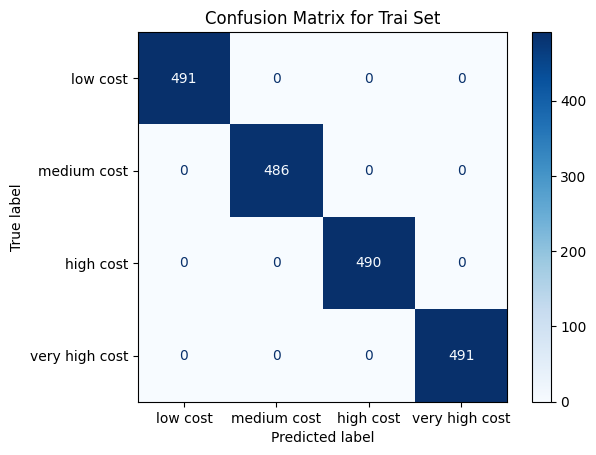

In [76]:
#evaluation: confusion matrix for train samples
cm_dt_train = confusion_matrix(y_train, y_train_pred_dt)


# Plot the confusion matrix for train samples
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt_train, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Trai Set')
plt.show()

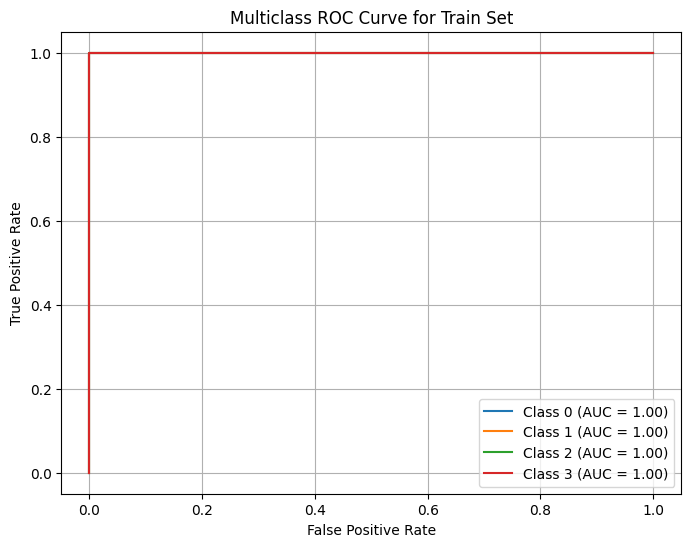

In [77]:
#calculate y_train_prob
y_train_prob = pipe_dt.predict_proba(X_train)  # Probabilities for the positive class (class 1)

# Plot roc curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(pipe_dt.classes_):
    plot_roc_curve(y_train == i, y_train_prob[:, i], class_name)

# Finalize the plot
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Multiclass ROC Curve for Train Set')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [78]:
#evaluation on test cases
target_names = ['low cost', 'medium cost', 'high cost','very high cost' ]
print(classification_report(y_test, y_hat_dt, target_names=target_names))

                precision    recall  f1-score   support

      low cost       1.00      1.00      1.00       500
   medium cost       1.00      1.00      1.00       500
     high cost       1.00      1.00      1.00       500
very high cost       1.00      1.00      1.00       500

      accuracy                           1.00      2000
     macro avg       1.00      1.00      1.00      2000
  weighted avg       1.00      1.00      1.00      2000



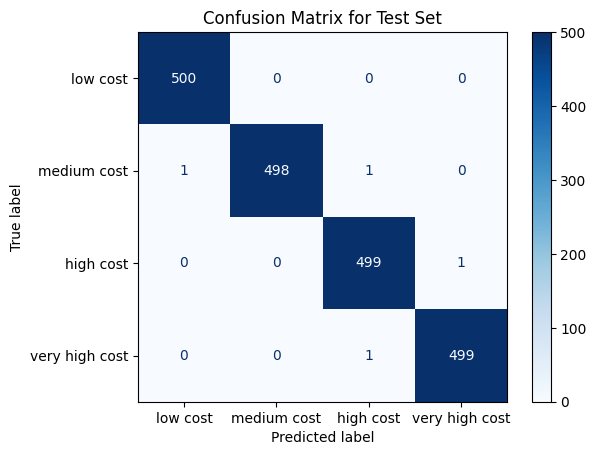

In [79]:
#evaluation: confusion matrix
cm_dt = confusion_matrix(y_test, y_hat_dt)


# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set')
plt.show()

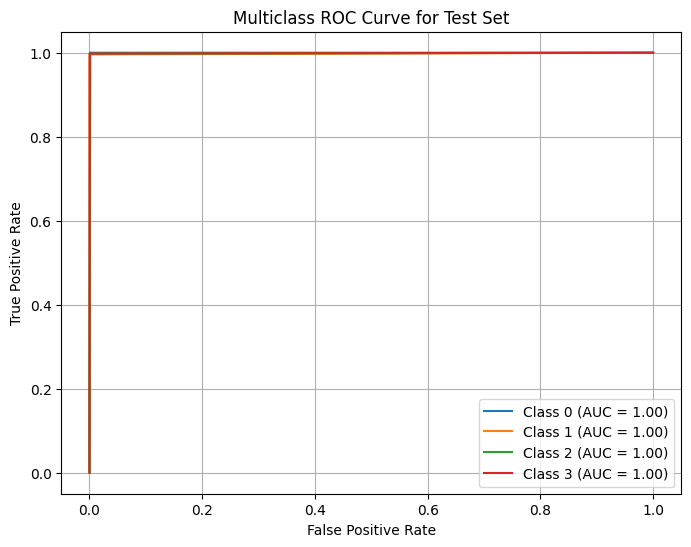

In [80]:
#calculate y_hat_prob
y_hat_prob = pipe_dt.predict_proba(X_test)  # Probabilities for the positive class (class 1)

# Plot roc curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(pipe_dt.classes_):
    plot_roc_curve(y_test == i, y_hat_prob[:, i], class_name)

# Finalize the plot
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Multiclass ROC Curve for Test Set')
plt.legend(loc='lower right')
plt.grid()
plt.show()



In [81]:
#KNearest Neighbour

#train pipeline
pipe_knn.fit(X_train,y_train)

#predict values
y_hat_knn = pipe_knn.predict(X_test)

In [82]:
#evaluation 
target_names = ['low cost', 'medium cost', 'high cost','very high cost' ]
print(classification_report(y_test, y_hat_knn, target_names=target_names))

                precision    recall  f1-score   support

      low cost       0.95      0.95      0.95       500
   medium cost       0.88      0.91      0.89       500
     high cost       0.88      0.90      0.89       500
very high cost       0.97      0.92      0.95       500

      accuracy                           0.92      2000
     macro avg       0.92      0.92      0.92      2000
  weighted avg       0.92      0.92      0.92      2000



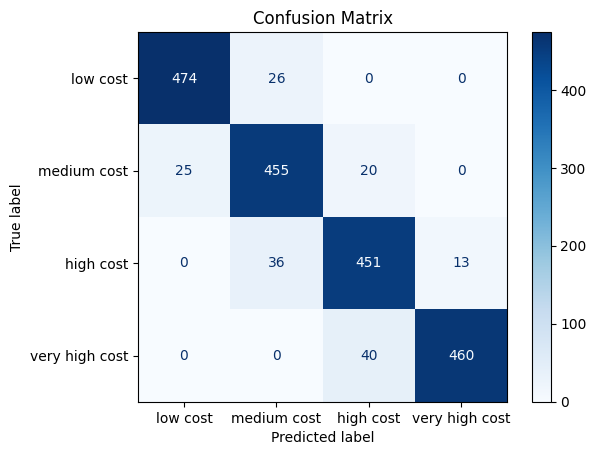

In [83]:
#evaluation: confusion matrix
cm_knn = confusion_matrix(y_test, y_hat_knn)


# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

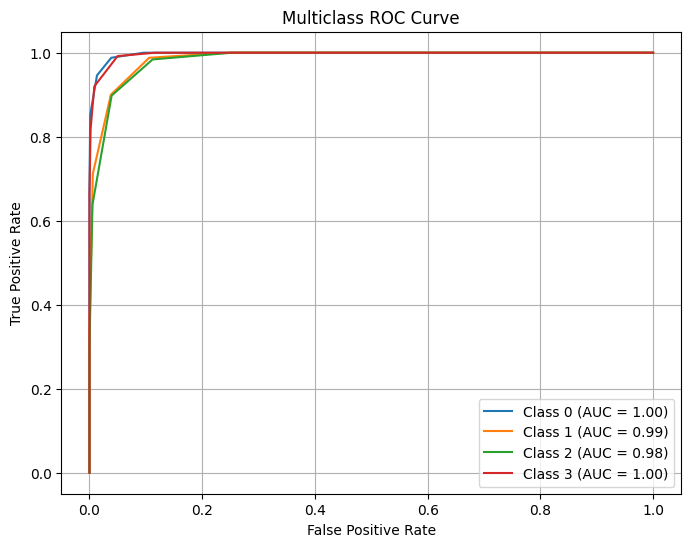

In [84]:
#calculate y_hat_prob
y_hat_prob_knn = pipe_knn.predict_proba(X_test)  # Probabilities for the positive class (class 1)

# Plot roc curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(pipe_knn.classes_):
    plot_roc_curve(y_test == i, y_hat_prob_knn[:, i], class_name)

# Finalize the plot
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Both models showing classic overfitting 

In [86]:
#Hyperparameter tuning

In [87]:
#Decision Treee
param_grid = {
    'decision_tree__max_depth': [3, 5, 10, None],
    'decision_tree__min_samples_split': [2, 5, 10],
    'decision_tree__min_samples_leaf': [1, 2, 5],
    'decision_tree__criterion': ['gini', 'entropy']    
}
#initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipe_dt,
                           param_grid= param_grid,
                           cv=5,
                           scoring='precision_macro',
                           n_jobs=-1,
                           verbose=1                           
                           )

In [88]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decision_tree',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [3, 5, 10, None],
                         'decision_tree__min_samples_leaf': [1, 2, 5],
                         'decision_tree__min_samples_split': [2, 5, 10]},
             scoring='precision_macro', verbose=1)

In [89]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_


Best Parameters: {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 10, 'decision_tree__min_samples_leaf': 1, 'decision_tree__min_samples_split': 2}
Best Cross-Validation Score: 0.8754993009442481


In [90]:
y_hat_gs = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_hat_gs))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       500
           1       1.00      0.99      0.99       500
           2       0.99      1.00      1.00       500
           3       1.00      1.00      1.00       500

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

